In [7]:
import pickle
import pandas as pd

In [8]:
!pwd

/Users/geoffrey/jupyter/lesson/210301


In [9]:
docs = pd.read_pickle("/Users/geoffrey/jupyter/lesson/210224/test_pickle_df")

In [10]:
docs = docs.tolist()

# Sample text를 이용한 예시

In [11]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [12]:
# 우리가 사용하고 있는 문서 형태 (word2vec에서 사용)
common_texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

In [13]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(common_texts)]

In [14]:
documents[:2]

[TaggedDocument(words=['human', 'interface', 'computer'], tags=[0]),
 TaggedDocument(words=['survey', 'user', 'computer', 'system', 'response', 'time'], tags=[1])]

In [15]:
model = Doc2Vec(documents, vector_size=10, window=2, min_count=1, workers=4,)

In [16]:
# tag '1'인 문서와 가장 유사한 (positive) 문서 번호 찾기
model.docvecs.most_similar(positive=1)

[(4, 0.3620721995830536),
 (3, 0.28050655126571655),
 (2, 0.25406789779663086),
 (5, 0.2361711859703064),
 (8, 0.18256065249443054),
 (6, -0.24382692575454712),
 (7, -0.4440457224845886),
 (0, -0.602814793586731)]

In [17]:
# document tag '0'의 embedding value
model.docvecs[0]

array([ 0.04729119, -0.03780374,  0.01409678, -0.04821598,  0.00504921,
       -0.00914113, -0.00739535, -0.03826785, -0.01997916,  0.03281765],
      dtype=float32)

In [18]:
model.docvecs[1]

array([-0.03631768,  0.03123203,  0.01344498,  0.02408767,  0.01356568,
       -0.02072673,  0.01990961, -0.0098028 ,  0.02247633, -0.00441453],
      dtype=float32)

In [20]:
model.docvecs.vectors_docs

array([[ 0.04729119, -0.03780374,  0.01409678, -0.04821598,  0.00504921,
        -0.00914113, -0.00739535, -0.03826785, -0.01997916,  0.03281765],
       [-0.03631768,  0.03123203,  0.01344498,  0.02408767,  0.01356568,
        -0.02072673,  0.01990961, -0.0098028 ,  0.02247633, -0.00441453],
       [ 0.00954493,  0.01580653,  0.03681368,  0.00816095, -0.01102549,
        -0.01572411, -0.03965645, -0.04004205,  0.03377543, -0.03788505],
       [-0.04555554, -0.01888884,  0.0456192 ,  0.00803212,  0.01396764,
         0.02139056,  0.00328984,  0.0091    ,  0.00350022,  0.03198175],
       [-0.04255107,  0.02271933, -0.04799934,  0.03188011,  0.01399965,
         0.01820397,  0.00087483,  0.04360212,  0.02202865, -0.02894181],
       [-0.02653088,  0.04260865,  0.02273143, -0.02532611, -0.04447037,
        -0.04596559, -0.0390735 , -0.03968139, -0.01384972, -0.02291238],
       [ 0.03056549, -0.03821003, -0.04426297,  0.04267707, -0.0331955 ,
        -0.02929484, -0.04328794, -0.00486061

# 실제 데이터에 적용해보기

In [12]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(docs)]

In [13]:
model = Doc2Vec(documents,
                window=2,
                min_count=1,
                workers=4,
                vector_size=50,  # word2vec은 size
                epochs=200) # word2vec은 iter

In [14]:
model.docvecs.most_similar(positive=0)

[(87, 0.6918522119522095),
 (25, 0.6631478071212769),
 (169, 0.6479213833808899),
 (36, 0.6016690731048584),
 (223, 0.591008722782135),
 (8, 0.5846248865127563),
 (133, 0.5594941973686218),
 (54, 0.5590277910232544),
 (242, 0.5558837056159973),
 (165, 0.5540931224822998)]

In [6]:
!pwd

/Users/geoffrey/jupyter/lesson/210301


In [15]:
# 원본 불러와서 비교
df = pd.read_csv('/Users/geoffrey/jupyter/lesson/210131/test.csv')

In [16]:
df.meta_keywords[0]

'Clear aligners,Invisalign®,Invisible orthodontics,Treatment outcomes.'

In [17]:
df.meta_keywords[87]

'Technological advances,Treatment efficiency.'

In [18]:
df.links[87]

'https://pubmed.ncbi.nlm.nih.gov/27226964/'

# T-SNE 직접 해보기?

In [19]:
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

In [20]:
tsne = TSNE(n_components=2)


In [21]:
doc_vecs = []

for i in range(len(model.docvecs)):
    doc_vecs.append(model.docvecs[i])

In [25]:
# 50차원으로 임베딩 된 doc2vec vectors
doc_vecs[:2]

[array([-3.1133459 , -0.93146455,  0.20540926, -1.2687359 ,  2.6171699 ,
        -0.18507926, -3.7396345 ,  3.7504954 , -0.8223462 ,  1.4383216 ,
         0.978685  ,  0.32186136,  1.9325019 , -1.5815163 , -0.1800521 ,
        -0.9564756 ,  2.0164304 , -4.7709565 ,  2.6817663 ,  2.806309  ,
         1.4514115 ,  1.7221023 , -0.10488365, -4.012127  ,  0.14250165,
        -2.3836603 ,  0.15611258, -1.9534906 ,  2.4277117 , -0.8381856 ,
        -0.29498306, -2.2610354 ,  1.2206606 , -0.31355244,  0.429883  ,
         2.5121915 ,  0.12920073, -3.7789123 , -3.8471355 ,  1.9036258 ,
         0.883977  ,  1.4299371 ,  0.06883668,  0.89340454, -2.130991  ,
         0.0815319 , -4.0927567 ,  2.1022315 ,  2.1960473 , -2.9255068 ],
       dtype=float32),
 array([-0.5928013 ,  2.172846  , -2.3995664 , -4.3103466 ,  2.8813117 ,
        -2.0913544 , -0.34156048,  1.9809101 , -0.6479476 ,  0.40128633,
        -2.1931636 ,  0.37306392,  5.343051  ,  0.14895783, -0.63312525,
        -1.1708136 ,  0.363

In [22]:
x_tsne = tsne.fit_transform(doc_vecs)

In [27]:
# 2차원 tsne로 임베딩 된 벡터
x_tsne[:10]

array([[  6.1372113,  -6.1602154],
       [  3.4976988,   1.3119124],
       [ -7.61958  ,   5.0093713],
       [ 16.689995 ,  -8.401651 ],
       [ 10.098326 ,  -8.743464 ],
       [  1.9336848,  -2.3464754],
       [ 18.271973 ,  -2.2937074],
       [  1.0474803,  -2.7066598],
       [ -6.813304 , -12.556388 ],
       [ 14.465013 ,  -5.7188606]], dtype=float32)

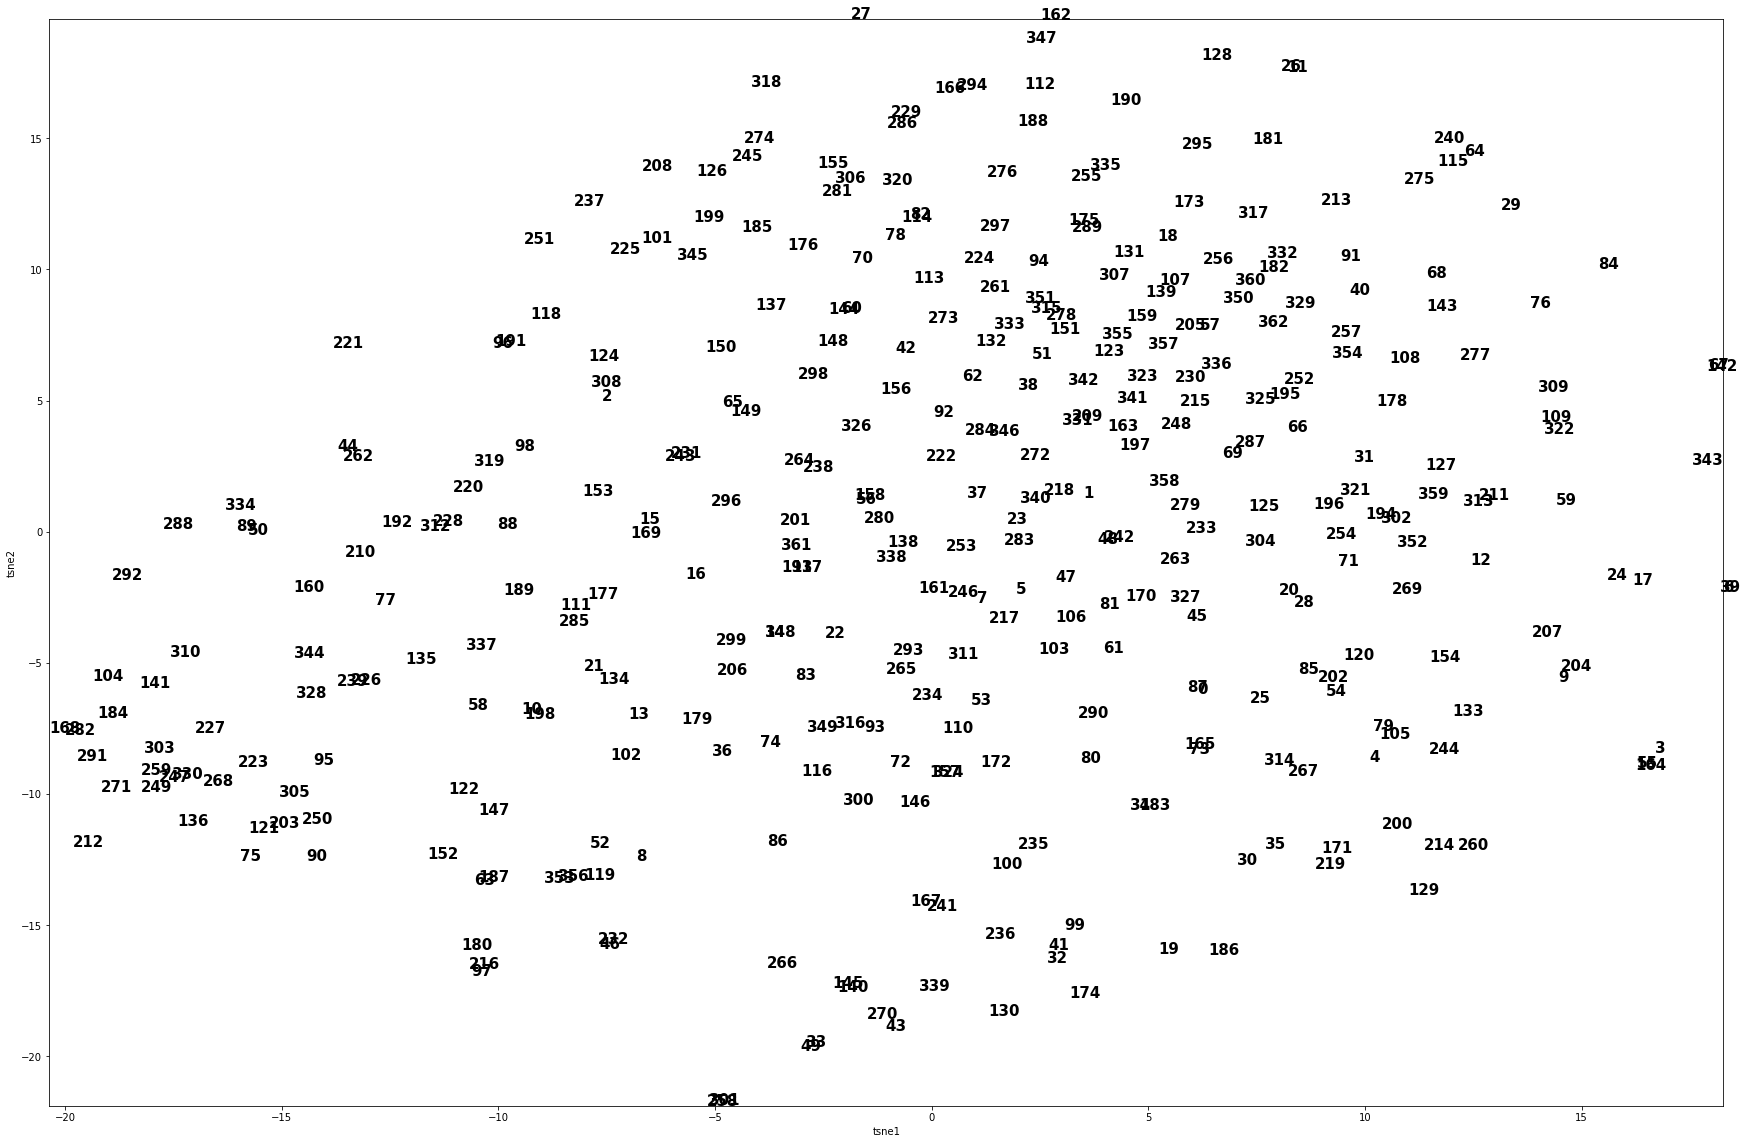

In [26]:

# 그림의 사이즈
plt.figure(figsize=(30, 20))
# x축, y축 길이를 지정
plt.xlim(x_tsne[:, 0].min(), x_tsne[:, 0].max())
plt.ylim(x_tsne[:, 1].min(), x_tsne[:, 1].max())

for i in range(len(x_tsne)):
    plt.text(x_tsne[i, 0], x_tsne[i, 1], str(i), fontdict={'weight': 'bold', 'size': 15})

plt.xlabel("tsne1")
plt.ylabel("tsne2")
plt.show()